Step 0 - arrange configuration


In [1]:
import globals
from BCI_IV_2a_experiment import set_params_by_dataset, parse_args, get_configurations
globals.set_dummy_config()
dataset = 'BCI_IV_2a'
globals.set('dataset', dataset)
set_params_by_dataset()
globals.set('valid_set_fraction', 0.2)


Step 1 - load data. select dataset and subject for experiment.


In [2]:
from data_preprocessing import get_bci_iv_2a_train_val_test

low_cut_hz = 0
subject_id = 1
train_set, val_set, test_set = get_bci_iv_2a_train_val_test('data/BCI_IV/',subject_id, low_cut_hz)


Extracting EDF parameters from data/BCI_IV/A01T.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...


/home/user/anaconda3/lib/python3.7/site-packages/mne/io/edf/edf.py:1083: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
/home/user/anaconda3/lib/python3.7/site-packages/braindecode/datasets/bcic_iv_2a.py:20: RuntimeWarning: Overlapping events detected. Use find_edf_events for the original events.
  raw_edf = mne.io.read_raw_edf(self.filename, stim_channel='auto')
/home/user/anaconda3/lib/python3.7/site-packages/braindecode/datasets/bcic_iv_2a.py:20: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw_edf = mne.io.read_raw_edf(self.filename, stim_channel='auto')
/home/user/anaconda3/lib/python3.7/site-packages/braindecode/datasets/bcic_iv_2a.py:20: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  raw_edf = mne.io.read_raw_edf(self.filename, stim_channel='auto')

Reading 0 ... 672527  =      0.000 ...  2690.108 secs...
Extracting EDF parameters from data/BCI_IV/A01E.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 686999  =      0.000 ...  2747.996 secs...


/home/user/anaconda3/lib/python3.7/site-packages/mne/io/edf/edf.py:1083: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
/home/user/anaconda3/lib/python3.7/site-packages/braindecode/datasets/bcic_iv_2a.py:20: RuntimeWarning: Overlapping events detected. Use find_edf_events for the original events.
  raw_edf = mne.io.read_raw_edf(self.filename, stim_channel='auto')
/home/user/anaconda3/lib/python3.7/site-packages/braindecode/datasets/bcic_iv_2a.py:20: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw_edf = mne.io.read_raw_edf(self.filename, stim_channel='auto')
/home/user/anaconda3/lib/python3.7/site-packages/braindecode/datasets/bcic_iv_2a.py:20: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  raw_edf = mne.io.read_raw_edf(self.filename, stim_channel='auto')

Step 2 - Load NN architecture of choice. Make a trained and untrained version.


In [3]:
from models_generation import target_model

trained_model = target_model('deep')
untrained_model = target_model('deep')



Step 2.5 - Train the trained version

In [4]:
from BCI_IV_2a_experiment import get_normal_settings
from naiveNAS import NaiveNAS

globals.set('batch_norm_alpha', 0.1)
globals.set('dropout_p', 0.5)
globals.set('max_epochs', 1)
globals.set('max_increase_epochs', 1)
globals.set('final_max_epochs', 1)
globals.set('final_max_increase_epochs', 1)
globals.set('do_early_stop', True)
globals.set('nn_objective', "accuracy")
globals.set('remember_best', True)
globals.set('batch_size', 60)
globals.set('do_early_stop', True)
input_time_length = globals.get('input_time_len')
stop_criterion, iterator, loss_function, monitors = get_normal_settings()
naiveNAS = NaiveNAS(iterator=iterator, exp_folder=None, exp_name=None,
                    train_set=train_set, val_set=val_set, test_set=test_set,
                    stop_criterion=stop_criterion, monitors=monitors, loss_function=loss_function,
                    config=globals.config, subject_id=1, fieldnames=None, strategy='per_subject',
                    csv_file=None, evolution_file=None)
naiveNAS.evaluate_model(trained_model)


(16.26970672607422,
 {'accuracy': {'train': 0.3521739130434783,
   'valid': 0.3275862068965517,
   'test': 0.3159722222222222}},
 Sequential(
   (dimshuffle): Expression(expression=_transpose_time_to_spat)
   (conv_time): Conv2d(1, 25, kernel_size=(10, 1), stride=(1, 1))
   (conv_spat): Conv2d(25, 25, kernel_size=(1, 22), stride=(1, 1), bias=False)
   (bnorm): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (conv_nonlin): Expression(expression=elu)
   (pool): MaxPool2d(kernel_size=(3, 1), stride=(3, 1), padding=0, dilation=1, ceil_mode=False)
   (pool_nonlin): Expression(expression=identity)
   (drop_2): Dropout(p=0.5)
   (conv_2): Conv2d(25, 50, kernel_size=(10, 1), stride=(1, 1), bias=False)
   (bnorm_2): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (nonlin_2): Expression(expression=elu)
   (pool_2): MaxPool2d(kernel_size=(3, 1), stride=(3, 1), padding=0, dilation=1, ceil_mode=False)
   (pool_nonlin_2): Expressi

Step 3 - Show layers of selected model

In [5]:
modules = {i: mod for i, mod in enumerate(list(trained_model.modules())[0])}
print(modules)

{0: Expression(expression=_transpose_time_to_spat), 1: Conv2d(1, 25, kernel_size=(10, 1), stride=(1, 1)), 2: Conv2d(25, 25, kernel_size=(1, 22), stride=(1, 1), bias=False), 3: BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 4: Expression(expression=elu), 5: MaxPool2d(kernel_size=(3, 1), stride=(3, 1), padding=0, dilation=1, ceil_mode=False), 6: Expression(expression=identity), 7: Dropout(p=0.5), 8: Conv2d(25, 50, kernel_size=(10, 1), stride=(1, 1), bias=False), 9: BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 10: Expression(expression=elu), 11: MaxPool2d(kernel_size=(3, 1), stride=(3, 1), padding=0, dilation=1, ceil_mode=False), 12: Expression(expression=identity), 13: Dropout(p=0.5), 14: Conv2d(50, 100, kernel_size=(10, 1), stride=(1, 1), bias=False), 15: BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 16: Expression(expression=elu), 17: MaxPool2d(kernel_size=(3, 1), stride=(3, 1), pa

Step 4 - Get intermediate output of selected layer


In [6]:
from braindecode.torch_ext.util import np_to_var
import numpy as np
select_layer = 20

def get_activation_maps(data, select_layer):
    x = np_to_var(data[:,:,:,None])
    trained_modules = list(trained_model.modules())[0]
    untrained_modules = list(untrained_model.modules())[0]
    print(f'start shape: {x.shape}')

    for l in trained_modules[:select_layer + 1]:
      x = l(x)
    trained_output = np.average(x.squeeze(dim=3).detach().numpy(), axis=0)

    x = np_to_var(data[:,:,:,None])
    for l in untrained_modules[:select_layer + 1]:
      x = l(x)
    untrained_output = np.average(x.squeeze().detach().numpy(), axis=0)
    print(f'end shape: {x.shape}')
    return trained_output, untrained_output

trained_output, untrained_output = get_activation_maps(train_set.X, select_layer)


start shape: torch.Size([230, 22, 1125, 1])
end shape: torch.Size([230, 200, 28, 1])


In [7]:
def get_raw_activation_maps(data, select_layer):
    x = np_to_var(data[:,:,:,None])
    trained_modules = list(trained_model.modules())[0]
    untrained_modules = list(untrained_model.modules())[0]
    print(f'start shape: {x.shape}')

    for l in trained_modules[:select_layer + 1]:
      x = l(x)
    trained_output = x.detach().numpy()

    x = np_to_var(data[:,:,:,None])
    for l in untrained_modules[:select_layer + 1]:
      x = l(x)
    untrained_output = x.detach().numpy()
    print(f'end shape: {x.shape}')
    return trained_output, untrained_output

Step 5 - Plot output of untrained and trained filters

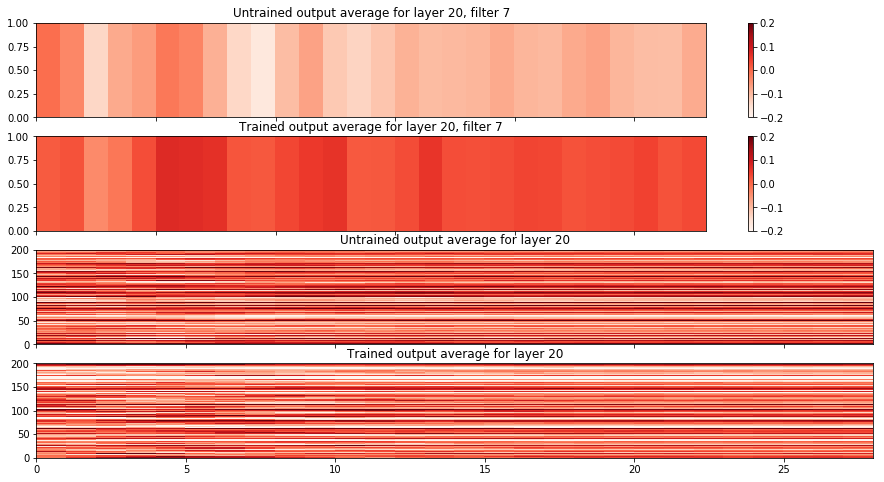

In [8]:
select_filter = 7
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
# plt.rcParams["figure.figsize"] = 5,2
def plot_activation_maps(trained_output, untrained_output, title=''):
    x = [i for i in range(len(trained_output[select_filter]))]
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, sharex=True)
    fig.suptitle(title, fontsize=16)
    ax1.set_title(f'Untrained output average for layer {select_layer}, filter {select_filter}')
    plot1 = ax1.pcolor(trained_output[select_filter][None, :], cmap=plt.cm.Reds, vmin=-0.2, vmax=0.2)
    ax2.set_title(f'Trained output average for layer {select_layer}, filter {select_filter}')
    plot2 = ax2.pcolor(untrained_output[select_filter][None, :], cmap=plt.cm.Reds, vmin=-0.2, vmax=0.2)
    ax3.set_title(f'Untrained output average for layer {select_layer}')
    ax3.pcolor(untrained_output, cmap=plt.cm.Reds, vmin=-0.2, vmax=0.2)
    ax4.set_title(f'Trained output average for layer {select_layer}')
    ax4.pcolor(trained_output, cmap=plt.cm.Reds, vmin=-0.2, vmax=0.2)
    fig.colorbar(plot1, ax=ax1)
    fig.colorbar(plot2, ax=ax2)

    fig.set_figheight(8)
    fig.set_figwidth(15)
    return fig

plot_activation_maps(trained_output, untrained_output)
plt.show()

Phase B - Calculate the mean activation map for each class, for the selected layer and filter.
Step B.1 - Sort training examples by class

In [9]:
left_X = train_set.X[np.where(train_set.y == 0)]
right_X = train_set.X[np.where(train_set.y == 1)]
foot_X = train_set.X[np.where(train_set.y == 2)]
tongue_X = train_set.X[np.where(train_set.y == 3)]

Step B.2 - For each class get the activation maps of the selected layer and filter and plot them as before

start shape: torch.Size([59, 22, 1125, 1])
end shape: torch.Size([59, 200, 28, 1])
start shape: torch.Size([59, 22, 1125, 1])
end shape: torch.Size([59, 200, 28, 1])
start shape: torch.Size([54, 22, 1125, 1])
end shape: torch.Size([54, 200, 28, 1])
start shape: torch.Size([58, 22, 1125, 1])
end shape: torch.Size([58, 200, 28, 1])


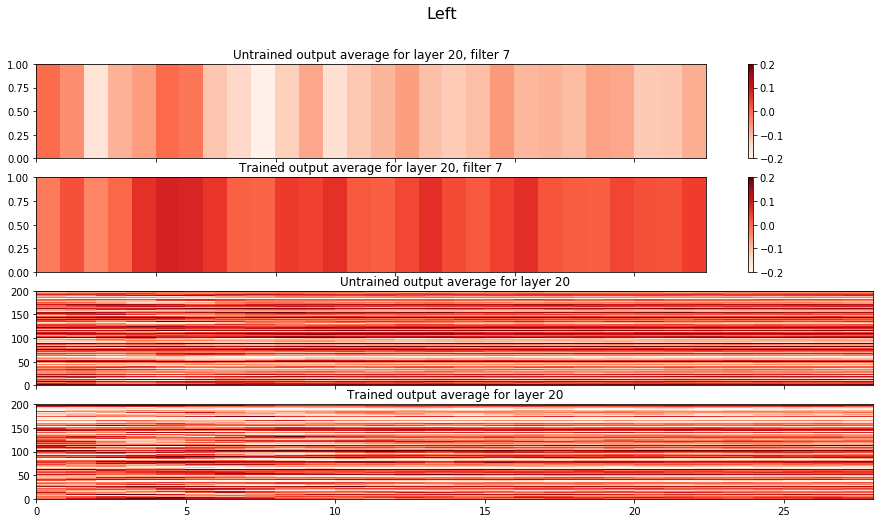

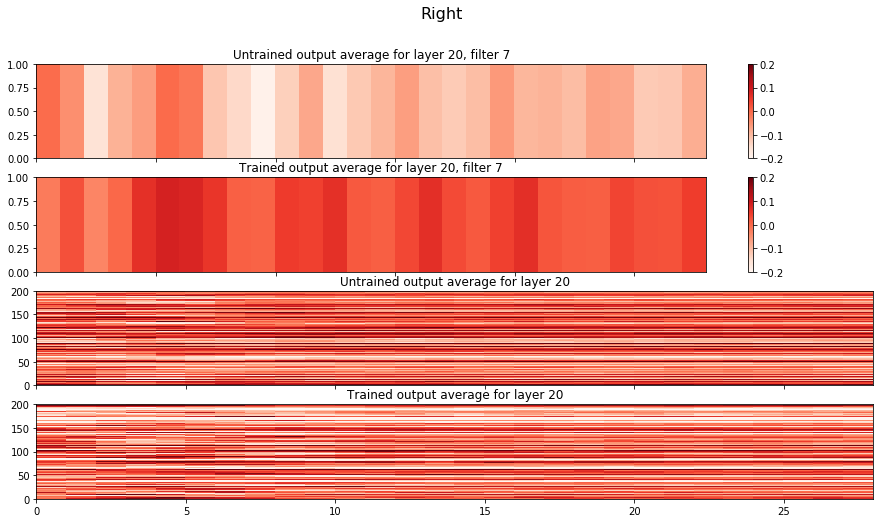

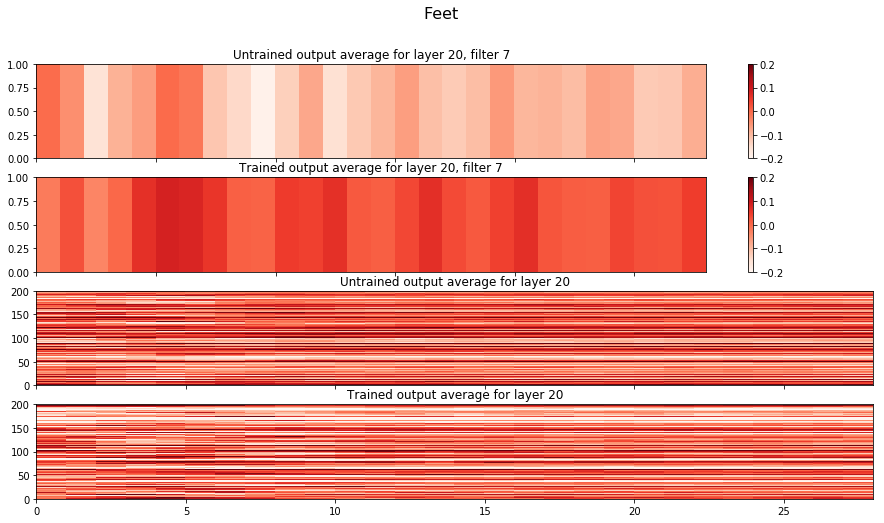

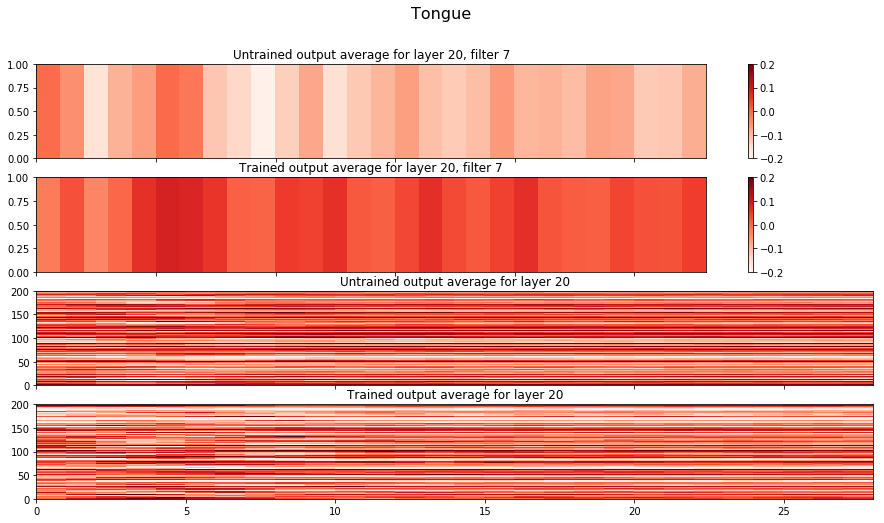

In [10]:
left_X_trained, left_X_untrained = get_activation_maps(left_X, select_layer)
right_X_trained, right_X_untrained = get_activation_maps(right_X, select_layer)
foot_X_trained, foot_X_untrained = get_activation_maps(foot_X, select_layer)
tongue_X_trained, tongue_X_untrained = get_activation_maps(tongue_X, select_layer)

plot_activation_maps(left_X_trained, left_X_untrained, 'Left')
plot_activation_maps(left_X_trained, left_X_untrained, 'Right')
plot_activation_maps(left_X_trained, left_X_untrained, 'Feet')
plot_activation_maps(left_X_trained, left_X_untrained, 'Tongue')
plt.show()

Phase C - Calculate the most active window for the specified filter (window size = receptive field) while regarding examples of all classes.

In [11]:
from braindecode.visualization.input_windows import calc_receptive_field_size

field_size = calc_receptive_field_size(trained_model, select_layer)
print(f'Field size is: {field_size}')

Field size is: [144  22]


In [12]:
from braindecode.visualization.input_windows import most_activating_input_windows
act_maps, _ = get_raw_activation_maps(train_set.X, select_layer)
print(act_maps.shape)
print(train_set.X.shape)
windows = most_activating_input_windows(train_set.X[:,:,:,None], act_maps, [144,1])
windows.shape

start shape: torch.Size([230, 22, 1125, 1])
end shape: torch.Size([230, 200, 28, 1])
(230, 200, 28, 1)
(230, 22, 1125)


(200, 11, 22, 144, 1)

Step C.1 - find the most active window of [receptive field] size regarding the whole dataset.

In [13]:
summed_train_example = np.swapaxes(np.sum(train_set.X, axis=0), 0, 1)
curr_sum = 0
window_index = 0
for i in range(summed_train_example.shape[0] - field_size[0]):
    if np.sum(summed_train_example[i:i+field_size[0]]) > curr_sum:
        curr_sum = np.sum(summed_train_example[i:i+field_size[0]])
        window_index = i
print(f'The window index is {window_index}')



The window index is 85


Actually, I think I was wrong. What I need is to find the most activated window of the layer before the requested convolutional layer. So I need to figure out its size first.

Step C.1 (revised) - find the size of the layer before the layer being investigated.

In [14]:
prev_output, _ = get_activation_maps(train_set.X, select_layer - 1)
prev_output.shape

start shape: torch.Size([230, 22, 1125, 1])
end shape: torch.Size([230, 100, 37, 1])


(100, 37)

Step C.2 - get kernel size of investigated layer.

In [15]:
kernel_size = trained_model[select_layer].kernel_size[0]
print(f'The kernel size is {kernel_size}')

The kernel size is 10


In [16]:
trained_model[select_layer].weight.shape

torch.Size([200, 100, 10, 1])

Step C.3 - get the highest activated window in the previous layer of size [kernel_size], and find the example in the training set which activates this window the most.

In [17]:
# prev_output_sum = np.sum(prev_output, axis=0)
# prev_output_sum.shape
# curr_sum = 0
# window_index = 0
# for i in range(len(prev_output_sum) - kernel_size):
#     if np.sum(prev_output_sum[i:i+kernel_size) > curr_sum:
#         curr_sum = np.sum(summed_train_example[i:i+field_size[0]])
#         window_index = i
# print(f'The window index is {window_index}')


Step C.1 - Get the window of highest activation in the selected layer

In [18]:
curr_output, _ = get_activation_maps(train_set.X, select_layer)
curr_output_sum = np.sum(curr_output, axis=0)
curr_output_sum.shape
curr_sum = float("-infinity")
window_index = 0
window_size = 10
for i in range(len(curr_output_sum) - window_size):
    if np.abs(np.sum(curr_output_sum[i:i+window_size])) > curr_sum:
        curr_sum = np.sum(curr_output_sum[i:i+window_size])
        window_index = i
print(f'The window index is {window_index}')


start shape: torch.Size([230, 22, 1125, 1])
end shape: torch.Size([230, 200, 28, 1])
The window index is 17


Step C.2 - Find the training example that activates this window in the selected filter the most

In [19]:
max_activation = 0
for example in train_set.X:
    trained_output, _ = get_activation_maps(example[None, :, :], select_layer)
    print(trained_output.shape)
    curr_activation = np.abs(np.sum(trained_output[select_filter][window_index:window_index+window_size]))
    if curr_activation > max_activation:
        max_activation = curr_activation
        selected_example = example
        
selected_example

start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)

end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])

end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])
end shape: torch.Size([1, 200, 28, 1])
(200, 28)
start shape: torch.Size([1, 22, 1125, 1])

array([[ 0.4005531 ,  0.26806945,  0.10347111, ..., -0.7140849 ,
        -0.42620683, -0.2032516 ],
       [ 0.23743856,  0.05802522, -0.07540415, ..., -0.59309834,
        -0.22745472, -0.00978097],
       [ 0.4428975 ,  0.3307529 ,  0.20787871, ..., -0.32977825,
        -0.02398907,  0.1374148 ],
       ...,
       [ 0.57967234,  0.47547886,  0.4211957 , ...,  0.16104075,
         0.41340342,  0.45607838],
       [ 0.57226217,  0.47041234,  0.45160612, ...,  0.09879744,
         0.37981462,  0.4432443 ],
       [ 0.55882   ,  0.5164477 ,  0.5550333 , ..., -0.34259266,
         0.00133319,  0.07474586]], dtype=float32)

Display a certain channel of the selected training example

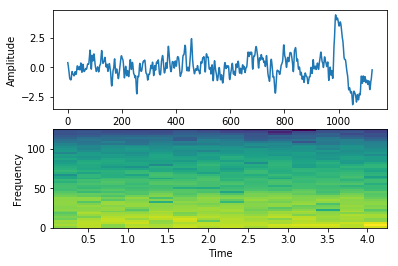

In [20]:
selected_channel = 0

plt.subplot(211)
plt.plot(np.arange(len(selected_example[0])), selected_example[0])
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.subplot(212)
powerSpec, freqFound, time, imageAxis = plt.specgram(selected_example[0], NFFT=100, Fs=250, noverlap=25)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

Phase D: Perform gradient optimization on the selected filter output to generate a training sample that maximizes its output.

In [21]:
import os
import torch
from torch.optim import Adam
from torch.autograd import Variable
from braindecode.torch_ext.util import np_to_var
from visualiazation.src.misc_functions import preprocess_image, recreate_image, save_image, create_mne
from models_generation import target_model
import numpy as np
from scipy import signal


class CNNLayerVisualization():
    """
        Produces an image that minimizes the loss of a convolution
        operation for a specific layer and filter
    """
    def __init__(self, model, selected_layer, selected_filter):
        self.model = model
        self.model.eval()
        self.selected_layer = selected_layer
        self.selected_filter = selected_filter
        self.conv_output = 0

    def hook_layer(self):
        def hook_function(module, grad_in, grad_out):
            # Gets the conv output of the selected filter (from selected layer)
            self.conv_output = grad_out[0, self.selected_filter]
        # Hook the selected layer
        self.model[self.selected_layer].register_forward_hook(hook_function)

    @staticmethod
    def create_spectrogram_2(data, fs):
        plt.subplot(211)
        plt.plot(np.arange(len(data)), data)
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')
        plt.subplot(212)
        frequencies, times, spectrogram = signal.spectrogram(data, fs=fs, window='hamming', noverlap=150)
        plt.pcolormesh(times, frequencies, 10*np.log10(spectrogram))
        plt.ylim((0,50))
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.show()


    def visualise_layer_with_hooks(self):
        # Hook the selected layer
        self.hook_layer()
        # Generate a random image
        random_image = np.float32(np.random.uniform(-1, 1, (1, 22, 1125, 1)))
        # Process image and return variable
        # processed_image = preprocess_image(random_image, False)
        processed_image = Variable(np_to_var(random_image), requires_grad=True)
        # Define optimizer for the image
        optimizer = Adam([processed_image], lr=0.1, weight_decay=1e-6)
        for i in range(1, 51):
            optimizer.zero_grad()
            # Assign create image to a variable to move forward in the model
            x = processed_image
            for index, layer in enumerate(self.model):
                # Forward pass layer by layer
                # x is not used after this point because it is only needed to trigger
                # the forward hook function
                x = layer(x)
                # Only need to forward until the selected layer is reached
                if index == self.selected_layer:
                    # (forward hook function triggered)
                    break
            # Loss function is the mean of the output of the selected layer/filter
            # We try to minimize the mean of the output of that specific filter
            loss = -torch.mean(self.conv_output)
            print('Iteration:', str(i), 'Loss:', "{0:.2f}".format(loss.data.numpy()))
            # Backward
            loss.backward()
            # Update image
            optimizer.step()
            # Recreate image
            self.created_image = create_mne(processed_image)

            if i % 10 == 0:
                CNNLayerVisualization.create_spectrogram_2(np.array(processed_image.detach().numpy().squeeze()[0]), 250)


Iteration: 1 Loss: 0.12
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 2 Loss: -0.10
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 3 Loss: -0.29
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 4 Loss: -0.44
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 5 Loss: -0.59
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 6 Loss: -0.73
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 7 Loss: -0.87
Creating RawArray with float64 data, n_channels=22, n_times=1125

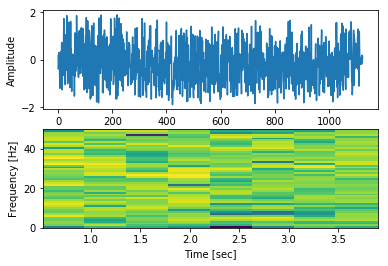

Iteration: 11 Loss: -1.37
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 12 Loss: -1.49
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 13 Loss: -1.61
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 14 Loss: -1.72
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 15 Loss: -1.84
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 16 Loss: -1.95
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 17 Loss: -2.05
Creating RawArray with float64 data, n_channels=22, n_ti

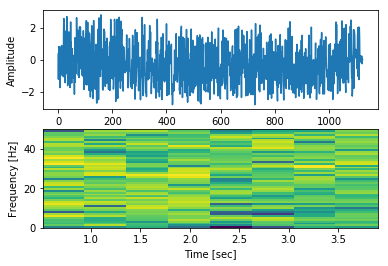

Iteration: 21 Loss: -2.48
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 22 Loss: -2.58
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 23 Loss: -2.68
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 24 Loss: -2.78
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 25 Loss: -2.88
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 26 Loss: -2.97
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 27 Loss: -3.07
Creating RawArray with float64 data, n_channels=22, n_ti

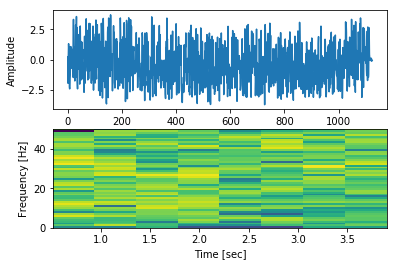

Iteration: 31 Loss: -3.44
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 32 Loss: -3.53
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 33 Loss: -3.62
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 34 Loss: -3.71
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 35 Loss: -3.80
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 36 Loss: -3.89
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 37 Loss: -3.98
Creating RawArray with float64 data, n_channels=22, n_ti

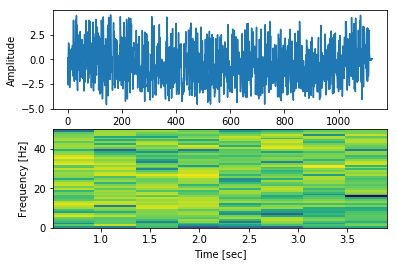

Iteration: 41 Loss: -4.32
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 42 Loss: -4.40
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 43 Loss: -4.49
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 44 Loss: -4.57
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 45 Loss: -4.65
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 46 Loss: -4.73
Creating RawArray with float64 data, n_channels=22, n_times=1125
    Range : 0 ... 1124 =      0.000 ...     4.496 secs
Ready.
Iteration: 47 Loss: -4.82
Creating RawArray with float64 data, n_channels=22, n_ti

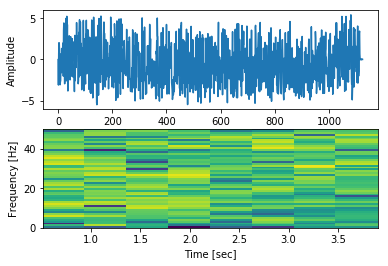

In [22]:
layer_vis = CNNLayerVisualization(trained_model, select_layer, select_filter)
layer_vis.visualise_layer_with_hooks()